In [1]:
library(keras)  # FashionMNIST dataset

library(nnet)   # For class.ind

Warning message:
“package ‘keras’ was built under R version 3.5.3”

# Dataset

First we load the dataset from keras package. _Check legacyLoad.R to see how to load the dataset without using the package._

In [2]:
fashion <- dataset_fashion_mnist()

In [3]:
str(fashion)
attach(fashion) # So we can access test and train directly!

List of 2
 $ train:List of 2
  ..$ x: int [1:60000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:60000(1d)] 9 0 0 3 0 2 7 2 5 5 ...
 $ test :List of 2
  ..$ x: int [1:10000, 1:28, 1:28] 0 0 0 0 0 0 0 0 0 0 ...
  ..$ y: int [1:10000(1d)] 9 2 1 1 6 1 4 6 5 7 ...


We get the following structure:

- train: Training dataset
    + x: the predictors, 28x28 pixels image in grayscale.
    + y: the response
- test: Testing datset (with x and y)

We can see the images with the following function:

## dataset visualization

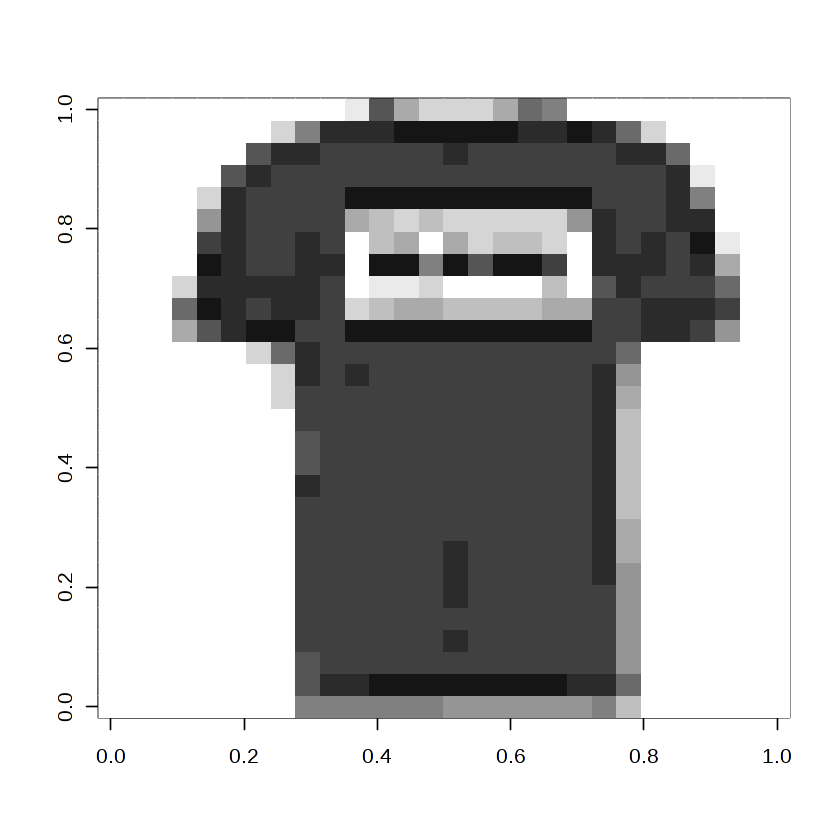

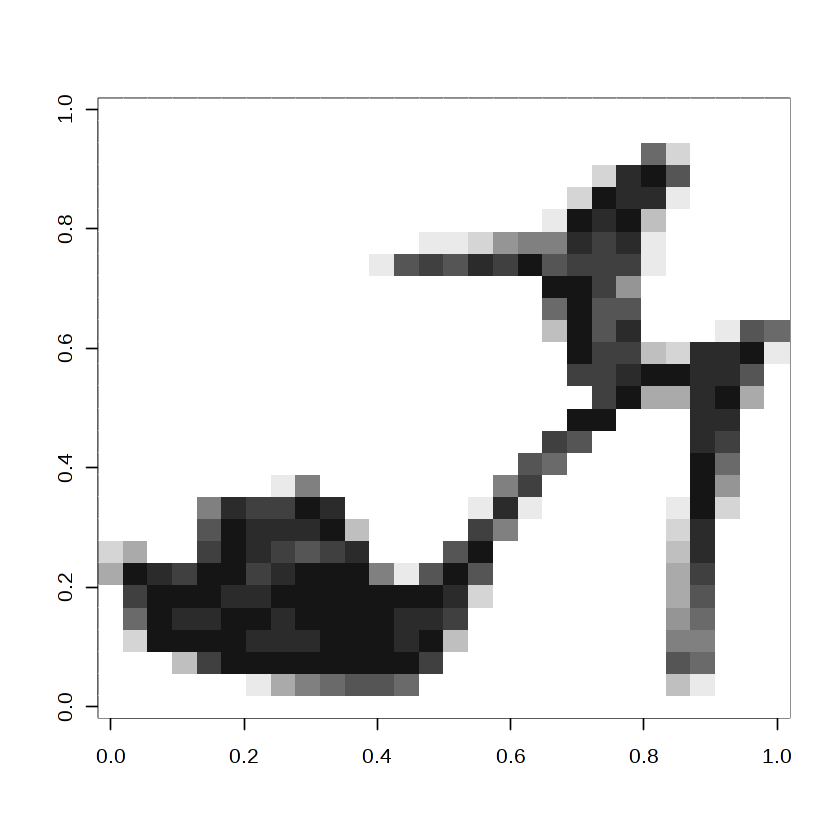

In [4]:
rotate <- function(x) t(apply(x, 2, rev))
show_image <- function(imgarray, col=gray(12:1/12), ...) {
  image(rotate(matrix(imgarray, nrow=28)), col=col, ...)
}

show_image(train$x[2,,])
show_image(train$x[10,,])

## Response reencode

Notice that in y we have an integer from 0 to 9 (10 classes). They are in fact the following:
- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

We recode the response variable to factor.

In [5]:
classString <- c("T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal",
              "Shirt","Sneaker", "Bag","Ankle boot")

# y+1 because 0 is the first class and in R we start indexing at 1!
train$yFactor <- as.factor(classString[train$y+1]) 
test$yFactor <- as.factor(classString[test$y+1])

For the CNN we use one hot encoding to produce a vector of 10 values per sample, with a one on the class (probablity of belonging to a given class).

In [6]:
train$yOneHot <- class.ind(train$yFactor)
test$yOneHot <- class.ind(test$yFactor)

In [7]:
str(train$yOneHot)
train$y[1:10]
train$yOneHot[1:10,]

 num [1:60000, 1:10] 1 0 0 0 0 0 0 0 0 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:10] "Ankle boot" "Bag" "Coat" "Dress" ...


ERROR while rich displaying an object: Error in withCallingHandlers({: No repr_* for mimetype application/geo+json in repr::mime2repr

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. stop("No repr_* for mim

[1] 9 0 0 3 0 2 7 2 5 5

ERROR while rich displaying an object: Error in withCallingHandlers({: No repr_* for mimetype application/geo+json in repr::mime2repr

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. stop("No repr_* for mim

limit_output extension: Maximum message size of 10000 exceeded with 10596 characters

*class.ind* reorders the classes alfabetically, therefore we need to revert this order to the original provided. We use *match* over the column names to get a vector of the reorder to match the column names to **classString**.

In [9]:
classString

ERROR while rich displaying an object: Error in withCallingHandlers({: No repr_* for mimetype application/geo+json in repr::mime2repr

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. stop("No repr_* for mim

[1] "T-shirt/top" "Trouser"     "Pullover"    "Dress"       "Coat"       
 [6] "Sandal"      "Shirt"       "Sneaker"     "Bag"         "Ankle boot"

In [16]:
# colnames(train$yOneHot)
# classString
m <- match(classString, colnames(test$yOneHot))

In [18]:
train$yOneHot <- train$yOneHot[,m]
test$yOneHot <- test$yOneHot[,m]

Now the order is correct

In [20]:
colnames(train$yOneHot)
classString

ERROR while rich displaying an object: Error in withCallingHandlers({: No repr_* for mimetype application/geo+json in repr::mime2repr

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. stop("No repr_* for mim

[1] "T-shirt/top" "Trouser"     "Pullover"    "Dress"       "Coat"       
 [6] "Sandal"      "Shirt"       "Sneaker"     "Bag"         "Ankle boot"

## Add missing dimension

Convolutional layers will expect the input to have 4 dimensions:
- Sample dimension
- Height dimension
- Width dimension
- Channel dimension

In our case we have only one channel as the image is grayscale. If it's a color image we would have 3 or 4 channels (Red, Green, Blue and Alpha (transparency)). We need to add the missing dimension, however this will not modify the data. 

In [21]:
dim(train$x) <- c(dim(train$x),1)
dim(test$x) <- c(dim(test$x),1)

# MLP With Keras

In [30]:
mlp <- keras_model_sequential() %>%
    layer_flatten() %>% # Images to vector format
    # First fully connected block (Hidden layer)
    layer_dense(units=500, activation="tanh") %>%
    # Second fully connected block (output layer)
    layer_dense(units=10, activation="softmax")

Now we check the architecture we have defined:

In [23]:
mlp

ERROR while rich displaying an object: Error in py_call_impl(callable, dots$args, dots$keywords): ValueError: This model has not yet been built. Build the model first by calling build() or calling fit() with some data. Or specify input_shape or batch_input_shape in the first layer for automatic build. 

Detailed traceback: 
  File "/home/agutierrez/.local/lib/python3.6/site-packages/keras/engine/network.py", line 1252, in summary
    'This model has not yet been built. '


Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv,

Notice that we're adjusting 1 million parameters this time. With the nnet one layer network we were training just 39.760 parameters.

Last thing we have to do is to specify which optimizaton algorithm and metrics
we want to use with the compile step.

In [31]:
sgd <- optimizer_sgd(
                     lr=0.05, 
                     decay=0.001, 
                     momentum=0.8, 
                     clipnorm=1.
)
mlp %>% compile(optimizer=sgd,
              loss='categorical_crossentropy', 
              metrics = "accuracy"
)

## Model training

Now we're going to train the network using CPU (if you're not using
tensorflow-gpu). Mind that if you want to use GPUs you need to have the GPU 
version of the package and the required Nvidia packages (check PlaidML for 
non-Nvidia GPUs). 

In [32]:
mlp %>% fit(
          train$x, 
          train$yOneHot, 
          batch_size=50,
          validation_split=0.2,
          epochs=10
)

And now we save the trained model for convenience:

In [ ]:
mlp %>% save_model_hdf5("mlp-FashionMNIST.h5")

## Predicting using the model

Predicting the label for the test set

In [ ]:
mlp <- load_model_hdf5("mlp-FashionMNIST.h5")

In [33]:
mlp

ERROR while rich displaying an object: Error in withCallingHandlers({: No repr_* for mimetype application/geo+json in repr::mime2repr

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. stop("No repr_* for mim

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
flatten_1 (Flatten)                 (None, 784)                     0           
________________________________________________________________________________
dense_7 (Dense)                     (None, 500)                     392500      
________________________________________________________________________________
dense_8 (Dense)                     (None, 10)                      5010        
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
________________________________________________________________________________



In [34]:
pred_prob <- predict(mlp, test$x)

In [35]:
head(pred_prob)

ERROR while rich displaying an object: Error in withCallingHandlers({: No repr_* for mimetype application/geo+json in repr::mime2repr

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. stop("No repr_* for mim

4.540803e-06,8.791309e-06,2.139217e-05,9.814815e-06,0.0001774921,6.102460e-02,2.165447e-05,1.549648e-01,4.719566e-04,7.832950e-01
2.198748e-02,2.500323e-03,6.872656e-01,1.190783e-02,0.0721657649,4.740197e-04,1.940271e-01,2.593013e-04,9.303630e-03,1.090809e-04
1.058842e-04,9.987991e-01,1.804550e-05,1.057077e-04,0.0009178472,9.979938e-08,4.218828e-05,2.782406e-06,7.963723e-06,3.578817e-07
7.058509e-06,9.989715e-01,9.597979e-06,8.868658e-04,0.0001150725,5.577566e-08,5.972106e-06,1.028824e-06,1.133481e-06,1.810177e-06
1.379866e-01,3.777438e-03,1.635328e-01,9.663037e-02,0.0484997965,2.264287e-03,5.388918e-01,4.388767e-04,7.277908e-03,7.000815e-04
8.497167e-05,9.938033e-01,1.955942e-04,2.485201e-04,0.0053697238,3.207627e-07,2.619921e-04,7.430316e-06,2.739106e-05,7.473585e-07


For each element we get the probability of that element to be of each class, therefore we search for the value that is maximum in each row and then we create the confusion matrix.

In [36]:
predClass <- apply(pred_prob,1,which.max)
predClass <- classString[predClass] # And change the integers by their class tag


trueClass <- test$yFactor

# Now we do a confusion matrix and analyze it
cMatrix <- table(trueClass,predClass)

In [37]:
correctClass <- sum(diag(cMatrix))
total <- sum(cMatrix)
accuracy <- correctClass/total

As it is we will get around 80% of accuracy